In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [26]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data.shape

In [ ]:
digits.data[0]

In [ ]:
digits.data[0].reshape(8,8)

In [ ]:
plt.gray()
plt.matshow(digits.data[63].reshape(8,8))

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)

In [6]:
df.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [7]:
x=df
y=digits.target

In [8]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
## PCA is used to remove the unwanted features, and using 95% of the datasets, create a components which is called PCA

In [13]:
from sklearn.decomposition import PCA
pca=PCA(0.95)

from sklearn.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [17]:
x_scaled.shape

(1797, 64)

In [20]:
xn=pca.fit_transform(x_scaled)

In [21]:
xn.shape

(1797, 30)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xn,y)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.9711111111111111

In [25]:
pca.explained_variance_ratio_

array([0.14815157, 0.13523675, 0.11706654, 0.08316524, 0.05736613,
       0.0485009 , 0.04252881, 0.03677515, 0.03323376, 0.03046634,
       0.02359531, 0.02282286, 0.01821312, 0.01773373, 0.0145856 ,
       0.01396272, 0.0131002 , 0.01243018, 0.01020389, 0.00909605,
       0.00890749, 0.00797984, 0.00788424, 0.0076321 , 0.00690211,
       0.00595599, 0.00576736, 0.00511271, 0.00500826, 0.00442501])

<Axes: >

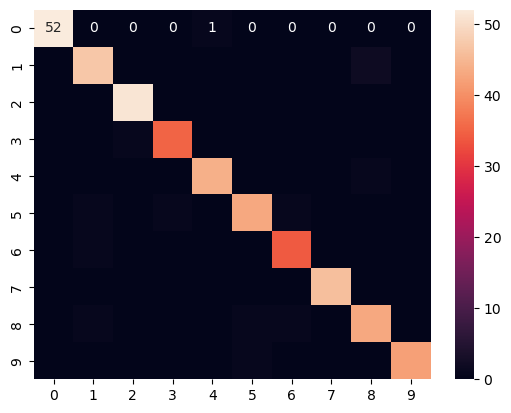

In [24]:
y_predict=lr.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predict)
import seaborn as sns
plt.xlabel('Ytest-truth')
plt.ylabel('Y_predicted')
sns.heatmap(cm,annot=True)